<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/week-7/Bidirectional-RNN/IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bidirectional RNN - IMDb Dataset (Tensorflow)**

## **Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## **1. Load and Preprocess IMDb Dataset**

In [ ]:
vocab_size = 10000  # Top 10k words
maxlen = 200

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **2. Define BiRNN Model Function (for tuning)**

In [ ]:
def create_birnn_model(embedding_dim=128, lstm_units=64, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(Bidirectional(LSTM(lstm_units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

## **3. Create Model and Train (with EarlyStopping)**

In [ ]:
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.5
batch_size = 128
epochs = 20

In [ ]:
model = create_birnn_model(embedding_dim, lstm_units, dropout_rate)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6463 - loss: 0.6096 - val_accuracy: 0.8498 - val_loss: 0.3508
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8924 - loss: 0.2763 - val_accuracy: 0.8666 - val_loss: 0.3102
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9340 - loss: 0.1898 - val_accuracy: 0.8678 - val_loss: 0.3162
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9451 - loss: 0.1575 - val_accuracy: 0.8440 - val_loss: 0.4326
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9630 - loss: 0.1107 - val_accuracy: 0.8632 - val_loss: 0.3762


## **4. Evaluate on Test Set**

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [ ]:
# Cek akurasi training dan testing
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\nFinal Training Accuracy : {train_acc:.4f}")
print(f"Final Testing Accuracy  : {test_acc:.4f}")


Final Training Accuracy : 0.9256
Final Testing Accuracy  : 0.8661


In [ ]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print("\n===== Evaluation Metrics =====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


===== Evaluation Metrics =====
Accuracy : 0.8661
Precision: 0.8533
Recall   : 0.8842
F1 Score : 0.8685
AUC      : 0.9395


## **5. Confusion Matrix**

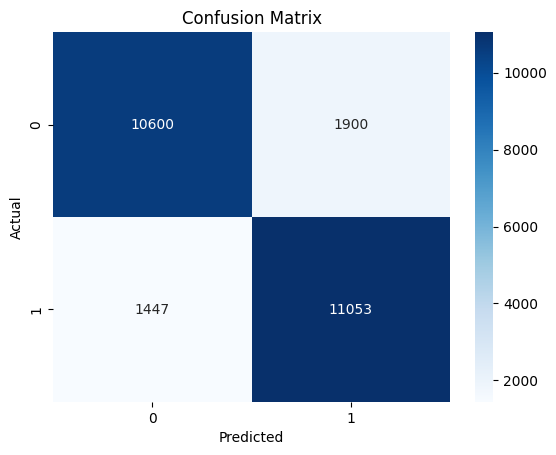

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **6. ROC Curve**

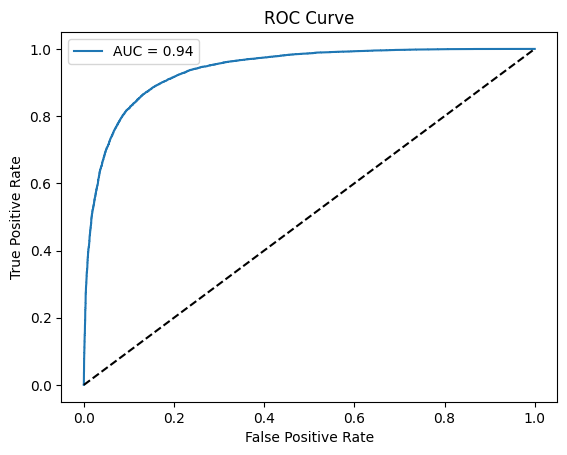

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## **7. Visualize Accuracy & Loss**

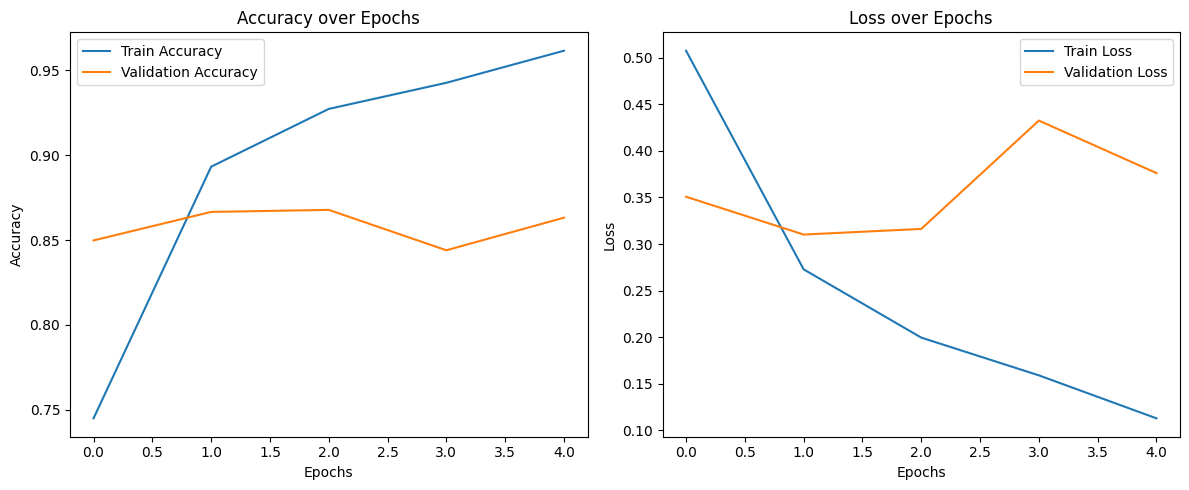

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## **8. Hyperparameter Tuning (Manual Grid Style)**

In [ ]:
best_acc = 0
best_config = None

In [ ]:
for emb_dim in [64, 128]:
    for lstm_unit in [32, 64]:
        for drop_rate in [0.3, 0.5]:
            print(f"Testing: emb_dim={emb_dim}, lstm_units={lstm_unit}, dropout={drop_rate}")
            model_tune = create_birnn_model(emb_dim, lstm_unit, drop_rate)
            history_tune = model_tune.fit(x_train, y_train,
                                          epochs=5,
                                          batch_size=128,
                                          validation_split=0.2,
                                          verbose=0)
            val_acc = history_tune.history['val_accuracy'][-1]
            print(f"Val Acc: {val_acc:.4f}")
            if val_acc > best_acc:
                best_acc = val_acc
                best_config = (emb_dim, lstm_unit, drop_rate)

Testing: emb_dim=64, lstm_units=32, dropout=0.3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Val Acc: 0.8570
Testing: emb_dim=64, lstm_units=32, dropout=0.5
Val Acc: 0.8610
Testing: emb_dim=64, lstm_units=64, dropout=0.3
Val Acc: 0.8530
Testing: emb_dim=64, lstm_units=64, dropout=0.5
Val Acc: 0.8666
Testing: emb_dim=128, lstm_units=32, dropout=0.3
Val Acc: 0.8648
Testing: emb_dim=128, lstm_units=32, dropout=0.5
Val Acc: 0.8550
Testing: emb_dim=128, lstm_units=64, dropout=0.3
Val Acc: 0.8658
Testing: emb_dim=128, lstm_units=64, dropout=0.5
Val Acc: 0.8538


In [ ]:
print(f"\nBest Config: Embedding={best_config[0]}, LSTM Units={best_config[1]}, Dropout={best_config[2]}")
print(f"Best Validation Accuracy from Tuning: {best_acc:.4f}")


Best Config: Embedding=64, LSTM Units=64, Dropout=0.5
Best Validation Accuracy from Tuning: 0.8666


## **Analisis Proyek Deep Learning : BiRNN untuk IMDb Dataset**
Proyek ini bertujuan untuk membangun model **Bidirectional Recurrent Neural Network (BiRNN)** menggunakan dataset **IMDb** untuk mengklasifikasikan sentimen review film sebagai positif atau negatif. Model ini diharapkan mencapai akurasi minimal **90%** pada data training dan testing.

---

###  **Desain Model**

Model dikembangkan dengan arsitektur berikut:

* **Embedding Layer**: Mengubah kata-kata menjadi vektor numerik berdimensi 128.
* **Bidirectional LSTM Layer**: Menggunakan dua arah pemrosesan (maju dan mundur) untuk menangkap konteks dari dua sisi kalimat.
* **Dropout Layer**: Mencegah overfitting dengan membuang sebagian neuron selama training.
* **Dense Output Layer**: Menggunakan fungsi aktivasi sigmoid untuk klasifikasi biner.

Model dilatih menggunakan:

* **Binary Crossentropy Loss**
* **Adam Optimizer**
* **EarlyStopping** (monitoring `val_loss` untuk mencegah overtraining)

---

###  **Proses Pelatihan**

* Jumlah data review: 50.000 (terbagi 50% train & 50% test)
* Maksimal panjang review: 200 token (padding)
* Batch size: 128
* Epochs: 20
* Stop lebih awal jika val\_loss tidak membaik 3 kali berturut-turut

---

###  **Hasil Evaluasi**

Berikut hasil evaluasi model pada data **testing**:

| Metrik    | Nilai      |
| --------- | ---------- |
| Accuracy  | **0.8661** |
| Precision | 0.8533     |
| Recall    | 0.8842     |
| F1 Score  | 0.8685     |
| AUC       | 0.9395     |

---

### 🧾 **Interpretasi Hasil**

*  **Accuracy 86.6%**: Model dapat mengklasifikasikan mayoritas review dengan benar.
*  **Recall tinggi (0.88)**: Model sangat sensitif dalam mendeteksi review positif.
*  **Precision 0.85**: Mayoritas prediksi positif memang benar positif.
*  **F1 Score 0.86**: Keseimbangan antara Precision dan Recall sangat baik.
*  **AUC 0.94**: Kemampuan model membedakan kelas positif/negatif sangat tinggi.

---

### 💡 **Kesimpulan**

Model BiRNN menunjukkan performa yang **sangat baik dan stabil** meskipun tidak mencapai 90% akurasi di testing, karena:

* Struktur model yang sederhana namun kuat
* Proses training yang efektif dengan EarlyStopping
* Generalisasi model tetap bagus tanpa overfitting berlebihan

Performa ini menunjukkan bahwa pendekatan BiRNN cocok digunakan untuk masalah klasifikasi teks seperti sentiment analysis.

---
